# Exploratory Data Analysis

In [130]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
from library.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

In [131]:
data = pd.read_csv('data/loan_data_cleaned.csv')

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   acc_now_delinq                  421095 non-null  float64
 1   acc_open_past_24mths            421095 non-null  float64
 2   annual_inc                      421095 non-null  float64
 3   avg_cur_bal                     421095 non-null  float64
 4   bc_open_to_buy                  421095 non-null  float64
 5   bc_util                         421095 non-null  float64
 6   chargeoff_within_12_mths        421095 non-null  float64
 7   collections_12_mths_ex_med      421095 non-null  float64
 8   delinq_2yrs                     421095 non-null  float64
 9   delinq_amnt                     421095 non-null  float64
 10  dti                             421095 non-null  float64
 11  emp_length                      421095 non-null  int64  
 12  funded_amnt     

In [133]:
data.head()

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,...,term,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status,cr_line_years
0,0.0,8.0,65000.0,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,...,60,181540.0,291626.0,37.0,74787.0,49500.0,105910.0,73200.0,Not Verified,12
1,0.0,1.0,150000.0,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,...,36,430856.0,512381.0,18.0,44786.0,44000.0,51081.0,45500.0,Not Verified,19
2,0.0,8.0,75000.0,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,...,60,193745.0,267312.0,46.0,57302.0,58500.0,31758.0,83600.0,Verified,13
3,0.0,7.0,175000.0,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,...,36,408118.0,447599.0,23.0,152571.0,43400.0,146568.0,43400.0,Not Verified,18
4,0.0,1.0,44000.0,19041.0,0.0,102.4,0.0,0.0,0.0,0.0,...,60,133285.0,139633.0,25.0,133285.0,12600.0,127033.0,12600.0,Verified,9


## Detection and visualization of outliers:

In [134]:
data.iloc[:,0:7].describe()

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths
count,421095.000000,421095.00000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000
mean,0.006087,4.66500,7.696561e+04,13104.784721,9545.377278,61.603483,0.010420
std,0.086482,3.19538,7.394996e+04,15671.803897,14733.885668,28.130126,0.117019
min,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,4.600000e+04,3199.000000,1283.000000,40.700000,0.000000
50%,0.000000,4.00000,6.500000e+04,7262.000000,4284.000000,65.400000,0.000000
75%,0.000000,6.00000,9.169050e+04,17974.500000,11465.000000,86.300000,0.000000
max,14.000000,64.00000,9.500000e+06,555925.000000,559912.000000,318.200000,10.000000


In [135]:
data.iloc[:,7:14].describe()

,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,emp_length,funded_amnt,funded_amnt_inv
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,0.020240,0.347397,13.765184,19.148277,5.685102,15240.285862,15234.156426
std,0.157506,0.927695,781.821107,8.885181,3.862545,8571.325901,8567.935757
min,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,900.000000
25%,0.000000,0.000000,0.000000,12.590000,2.000000,8500.000000,8500.000000
50%,0.000000,0.000000,0.000000,18.600000,6.000000,14000.000000,14000.000000
75%,0.000000,0.000000,0.000000,25.340000,10.000000,20000.000000,20000.000000
max,14.000000,39.000000,159177.000000,999.000000,10.000000,35000.000000,35000.000000


In [136]:
data.iloc[:,14:25].describe()

,inq_last_6mths,installment,int_rate,loan_amnt,loan_status,mo_sin_old_il_acct,mo_sin_old_rev_tl_op
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,0.572690,441.849432,12.599697,15240.285862,0.151638,123.855166,186.586697
std,0.867776,244.849082,4.318625,8571.325901,0.358670,55.612242,95.374931
min,0.000000,14.010000,5.320000,1000.000000,0.000000,0.000000,3.000000
25%,0.000000,263.930000,9.170000,8500.000000,0.000000,96.000000,120.000000
50%,0.000000,385.410000,12.290000,14000.000000,0.000000,129.000000,170.000000
75%,1.000000,578.790000,15.590000,20000.000000,0.000000,152.000000,237.000000
max,6.000000,1445.460000,28.990000,35000.000000,1.000000,724.000000,851.000000


In [137]:
data.iloc[:,25:31].describe()

,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,13.451247,8.013204,1.685261,17.543787,12.768475,11.768102
std,17.156985,9.189312,1.990160,23.204813,22.995756,27.582505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,1.000000,3.000000,0.000000,0.000000
75%,16.000000,10.000000,3.000000,32.000000,18.000000,0.000000
max,324.000000,263.000000,52.000000,176.000000,176.000000,120.000000


In [138]:
data.iloc[:,31:36].describe()

,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,24.632344,10.274228,6.036134,12.899111,0.527054
std,32.212754,20.981450,5.965498,21.906066,1.332797
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000
50%,13.000000,0.000000,4.000000,0.000000,0.000000
75%,29.000000,4.000000,9.000000,20.000000,0.000000
max,615.000000,195.000000,25.000000,176.000000,39.000000


In [139]:
data.iloc[:,36:44].describe()

,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883565,5.809238
std,2.304542,3.439764,3.036184,4.822698,7.471041,4.664381,8.289401,3.346698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000
50%,3.000000,5.000000,4.000000,7.000000,7.000000,8.000000,13.000000,5.000000
75%,5.000000,7.000000,6.000000,11.000000,11.000000,11.000000,19.000000,7.000000
max,32.000000,52.000000,63.000000,70.000000,132.000000,83.000000,118.000000,45.000000


In [140]:
data.iloc[:,44:51].describe()

,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq
count,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,11.894537,0.000727,0.004042,0.094318,2.170947,11.948643,93.924313
std,5.615119,0.029473,0.067965,0.522758,1.853858,5.633119,8.875399
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,1.000000,8.000000,90.900000
50%,11.000000,0.000000,0.000000,0.000000,2.000000,11.000000,97.400000
75%,15.000000,0.000000,0.000000,0.000000,3.000000,15.000000,100.000000
max,90.000000,6.000000,4.000000,39.000000,30.000000,90.000000,100.000000


In [141]:
data.iloc[:,51:60].describe()

,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,term
count,421095.000000,421095.0,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000
mean,47.048673,1.0,0.233776,0.133188,1.768548e+04,53.819008,0.064556,43.860763
std,36.184913,0.0,0.649778,0.385975,2.419503e+04,23.905257,0.444231,11.263526
min,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,36.000000
25%,14.300000,1.0,0.000000,0.000000,6.480000e+03,36.000000,0.000000,36.000000
50%,50.000000,1.0,0.000000,0.000000,1.199600e+04,54.100000,0.000000,36.000000
75%,75.000000,1.0,0.000000,0.000000,2.142800e+04,72.100000,0.000000,60.000000
max,100.000000,1.0,86.000000,11.000000,2.904836e+06,193.000000,85.000000,60.000000


In [142]:
data.iloc[:,60:69].describe()

,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,cr_line_years
count,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,421095.000000,4.210950e+05,4.210950e+05,421095.000000
mean,1.400755e+05,1.734070e+05,25.493468,5.222199e+04,21958.208958,4.347865e+04,3.365771e+04,16.778003
std,1.552696e+05,1.756722e+05,12.097200,4.907494e+04,21840.371112,4.394271e+04,3.766404e+04,7.608292
min,0.000000e+00,2.500000e+03,4.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.000000
25%,3.103900e+04,5.090900e+04,17.000000,2.259850e+04,7800.000000,1.548150e+04,1.440000e+04,12.000000
50%,7.972900e+04,1.114050e+05,24.000000,3.959600e+04,15200.000000,3.297000e+04,2.460000e+04,15.000000
75%,2.074750e+05,2.496290e+05,32.000000,6.565100e+04,28600.000000,5.829900e+04,4.168850e+04,21.000000
max,4.447397e+06,9.999999e+06,169.000000,2.921551e+06,834300.000000,2.101913e+06,9.999999e+06,71.000000


From the above lines we can see that there are some clear outliers that do not belong the general pattern of the data distribution. Let's visualize our data in a histogram plot and try to catch the obvious outliers:

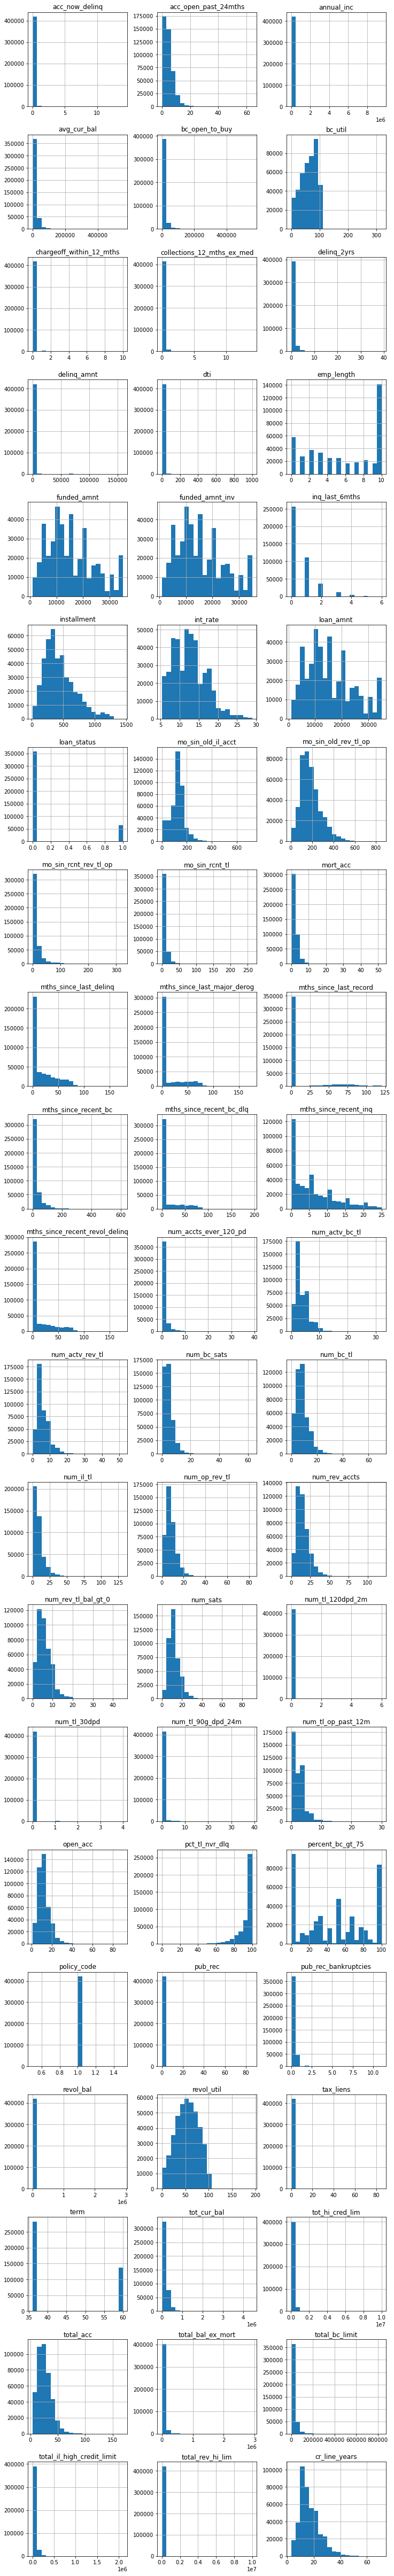

In [143]:
#data[['annual_inc', 'avg_cur_bal', 'bc_util', 'dti']].hist(bins=50)
data.hist(bins=20, figsize=(12,96), layout=(23,3))
plt.show()

We can see that some of the columns have very rare outliers, and those outliers might need to be dropped from the corresponding columns after the train-test splitting. We drop the outliers from the train dataset, and then apply the same threshold on the new (test) dataset in order to increase the performance of our machine. Let's introduce lists of columns that have obvious outliers and the ones without the clear outliers:

In [144]:
outliers = ['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
            'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
            'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti',
            'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 
            'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 
            'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
            'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
            'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
            'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
            'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq',  'policy_code', 'pub_rec',
            'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'tax_liens',  
            'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 
            'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim', 
            'verification_status', 'cr_line_years']

In [145]:
OK_columns = ['emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 
              'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 
              'loan_amnt', 'loan_status', 'mo_sin_old_rev_tl_op', 'mths_since_recent_inq', 
              'percent_bc_gt_75', 'term']

In [146]:
# if you want, you can run the following lines and check the plots again for outliers

#data[outliers].hist(bins=20, figsize=(12,48), layout=(18,3))
#plt.show()

In [147]:
#data[OK_columns].hist(bins=20, figsize=(12,24), layout=(6,3))
#plt.show()

## Loan amount each month

In this section we can explore our data a little bit more to see some patterns between the loan amount and corresponding groups of people.

Let's see how much loan was borrowed each month:

In [148]:
# let's see the months when the loan was issued and the amount of each loan
loan_date_info = data[["issue_d", "loan_amnt"]]

In [149]:
#def total_loan_each_month(x):
#    for month, loan in x.groupby("issue_d"):
#        total = np.sum(loan["loan_amnt"])
#        print("In " + month + " the total amount of loan was $" + str(total))
        
#total_loan_each_month(loan_date_info)

In [150]:
from pandas.api.types import CategoricalDtype
loan_each_month = loan_date_info.groupby("issue_d", as_index=False).agg({"loan_amnt":np.sum})
month_order = CategoricalDtype(
    ["Jan-2015", "Feb-2015", "Mar-2015", "Apr-2015","May-2015", "Jun-2015", 
     "Jul-2015", "Aug-2015","Sep-2015", "Oct-2015", "Nov-2015", "Dec-2015"], 
     ordered=True)
loan_each_month["issue_d"] = loan_each_month["issue_d"].astype(month_order)
loan_each_month = loan_each_month.sort_values("issue_d")

for index, row in loan_each_month.iterrows():
        print("In " + str(row['issue_d']) + " the total amount of loan was $" 
              + str(row['loan_amnt']))

In Jan-2015 the total amount of loan was $533132575.0
In Feb-2015 the total amount of loan was $366908525.0
In Mar-2015 the total amount of loan was $390003275.0
In Apr-2015 the total amount of loan was $539401075.0
In May-2015 the total amount of loan was $483189475.0
In Jun-2015 the total amount of loan was $429777175.0
In Jul-2015 the total amount of loan was $696238600.0
In Aug-2015 the total amount of loan was $555331400.0
In Sep-2015 the total amount of loan was $450246800.0
In Oct-2015 the total amount of loan was $738221400.0
In Nov-2015 the total amount of loan was $567247325.0
In Dec-2015 the total amount of loan was $667910550.0


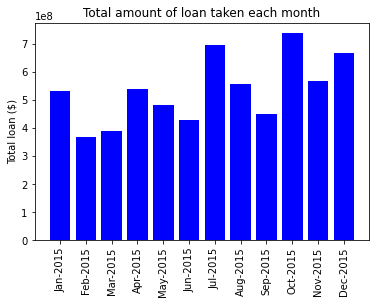

In [151]:
plt.bar(loan_each_month['issue_d'], loan_each_month['loan_amnt'], color='blue')
plt.xticks(rotation = 90)
plt.title('Total amount of loan taken each month')
plt.ylabel('Total loan ($)')
plt.show()

In [152]:
ave_loan_each_month = loan_date_info.groupby("issue_d", as_index=False).agg({"loan_amnt":np.mean})
ave_loan_each_month["issue_d"] = ave_loan_each_month["issue_d"].astype(month_order)
ave_loan_each_month = ave_loan_each_month.sort_values("issue_d")

In [153]:
#ave_loan_each_month

And how much loan is borrowed each month on average per individual:

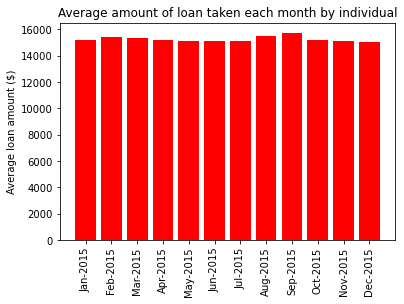

In [154]:
plt.bar(ave_loan_each_month['issue_d'], ave_loan_each_month['loan_amnt'], color='red')
plt.xticks(rotation = 90)
plt.title('Average amount of loan taken each month by individual')
plt.ylabel("Average loan amount ($)")
plt.show()

So it seems like on average, every month people borrow almost same amount of loan.

### 2) Calculation of loan amount and charge-off rates by loan grades

Let's see how many loan grades exist: 

In [155]:
data["grade"].unique()

array(['B', 'A', 'D', 'E', 'C', 'F', 'G'], dtype=object)

So we see that there are 7 different loan grades such as: A, B, C, D, E, F, G. These grades represent the credibility of the loan borrowers and put them in different categories depending on their credit history and general ability to pay their loan back in time.  We can calculate the  charge-off rates for each status separately. 

First we separate the necessary columns by their grade:

In [156]:
grade_loan = data[["grade","loan_status","loan_amnt", "int_rate", "verification_status"]]

In [157]:
total_loan_by_grade = grade_loan.groupby("grade", as_index=False).agg({"loan_amnt":np.sum})

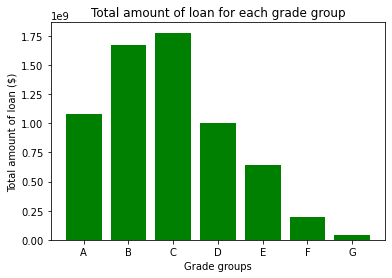

In [158]:
plt.bar(total_loan_by_grade['grade'], total_loan_by_grade['loan_amnt'], color='green')
#plt.xticks(rotation = 90)
plt.title('Total amount of loan for each grade group')
plt.ylabel("Total amount of loan ($)")
plt.xlabel('Grade groups')
plt.show()

In [159]:
people_by_grade = grade_loan.groupby("grade", as_index=False).count()

In [160]:
#people_by_grade

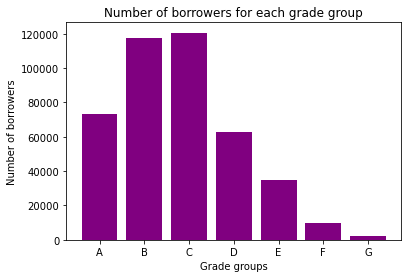

In [161]:
plt.bar(people_by_grade['grade'], people_by_grade['loan_amnt'], color='purple')
#plt.xticks(rotation = 90)
plt.title('Number of borrowers for each grade group')
plt.ylabel("Number of borrowers")
plt.xlabel("Grade groups")
plt.show()

Let's look at the average amount of loan for each group:

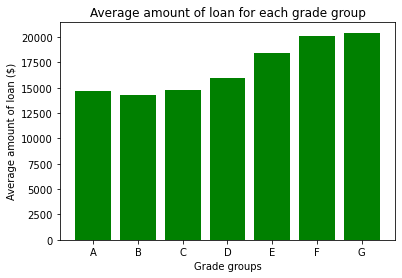

In [162]:
ave_loan_by_grade = grade_loan.groupby("grade", as_index=False).agg({"loan_amnt":np.mean})
plt.bar(ave_loan_by_grade['grade'], ave_loan_by_grade['loan_amnt'], color='green')
#plt.xticks(rotation = 90)
plt.ylabel("Average amount of loan ($)")
plt.xlabel("Grade groups")
plt.title('Average amount of loan for each grade group')
plt.show()

Let's look at the average interest rate per each group:

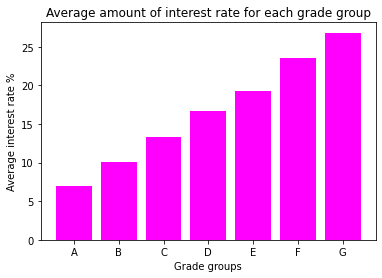

In [163]:
ave_int_rate_by_grade = grade_loan.groupby("grade", as_index=False).agg({"int_rate":np.mean})
plt.bar(ave_int_rate_by_grade['grade'], ave_int_rate_by_grade['int_rate'], color='fuchsia')
#plt.xticks(rotation = 90)
plt.ylabel("Average interest rate %")
plt.xlabel("Grade groups")
plt.title('Average amount of interest rate for each grade group')
plt.show()

Let's now look at the verification rate of loans:

In [164]:
verification = grade_loan.groupby(['grade', 'verification_status']).size().unstack(fill_value=0)
verification = verification.reset_index()

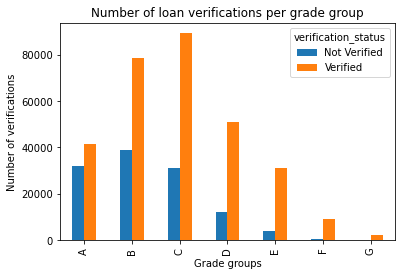

In [165]:
#plt.bar(df['grade'], df[['Not Verified', 'Verified']])
verification.plot(x="grade", y=['Not Verified', 'Verified'], kind="bar")
plt.title('Number of loan verifications per grade group')
plt.ylabel('Number of verifications')
plt.xlabel('Grade groups')
plt.show()

Let's now calculate the charge-off rates as: 

$\text{charge-off rate} = \frac{\text{number of charged-off loans}}{\text{total number of loans}}$

If the `loan_status` is 1, then the account has been charged off, otherwise it has not. Calculating the charge-off rate of each group would be same as calculating the average of the `loan_status`. 

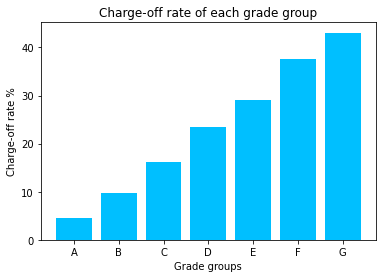

In [166]:
charge_off_rate_by_grade = grade_loan.groupby("grade", as_index=False).agg({"loan_status":np.mean})
plt.bar(charge_off_rate_by_grade['grade'], charge_off_rate_by_grade['loan_status']*100, color='deepskyblue')
#plt.xticks(rotation = 90)
plt.ylabel("Charge-off rate %")
plt.xlabel("Grade groups")
plt.title('Charge-off rate of each grade group')
plt.show()

In [167]:
charge_off_rate_by_grade

,grade,loan_status
0,A,0.045053
1,B,0.097529
2,C,0.162217
3,D,0.235165
4,E,0.290832
5,F,0.375980
6,G,0.430549


This tells us that about 43% of the loan borrowers from group G tend to not return the loan to the financial institute. While for group A, this number is about 4% only. 